In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from sysquant.estimators.vol import robust_vol_calc
from systems.accounts.account_forecast import pandl_for_instrument_forecast
from systems.basesystem import System
from systems.tests.testdata import get_test_object_futures_with_portfolios
from systems.accounts.accounts_stage import Account
from sysdata.config.configdata import Config

from pprint import pprint

In [3]:
(portfolio, posobject, combobject, capobject, rules, rawdata,data, config) = get_test_object_futures_with_portfolios()

In [4]:
# config = Config("private.private_config.yaml")

In [5]:
system = System([portfolio, posobject, combobject,
                capobject, rules, rawdata, Account()], data)

2023-08-07 16:15:24 DEBUG base_system {'stage': 'config'} Adding config defaults


In [6]:
system.config.instruments = ['SP500']

In [7]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy').ann_std()

2023-08-07 16:15:24 DEBUG base_system Following instruments are 'duplicate_markets' ['Another_thing', 'bad_thing'] 
2023-08-07 16:15:24 DEBUG base_system Following instruments are marked as 'ignore_instruments': not included: ['EXAMPLE']
2023-08-07 16:15:24 DEBUG base_system Following instruments removed entirely from sim: ['Another_thing', 'EXAMPLE', 'bad_thing']
2023-08-07 16:15:24 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'SP500'} Calculating pandl for instrument forecast for SP500 buy
2023-08-07 16:15:24 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'SP500'} Calculating capped forecast for SP500 buy
2023-08-07 16:15:24 DEBUG base_system {'stage': 'rules', 'instrument_code': 'SP500'} Calculating raw forecast SP500 for buy
2023-08-07 16:15:24 DEBUG base_system {'stage': 'rawdata', 'instrument_code': 'SP500'} Calculating daily prices for SP500
2023-08-07 16:15:24 DEBUG base_system {'stage': 'rawdata', 'instrument_code': 'SP500'} Calculating daily 

181547.57103742033

<Axes: xlabel='index'>

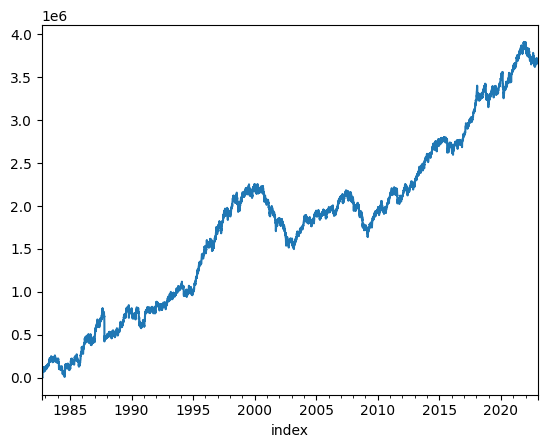

In [8]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy').curve().plot()

In [9]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy').percent.stats()

[[('min', '-20.54'),
  ('max', '6.667'),
  ('median', '0.04873'),
  ('mean', '0.03494'),
  ('std', '1.135'),
  ('skew', '-1.151'),
  ('ann_mean', '8.944'),
  ('ann_std', '18.15'),
  ('sharpe', '0.4926'),
  ('sortino', '0.6245'),
  ('avg_drawdown', '-15.03'),
  ('time_in_drawdown', '0.9419'),
  ('calmar', '0.118'),
  ('avg_return_to_drawdown', '0.5949'),
  ('avg_loss', '-0.8036'),
  ('avg_gain', '0.8153'),
  ('gaintolossratio', '1.015'),
  ('profitfactor', '1.09'),
  ('hitrate', '0.518'),
  ('t_stat', '3.157'),
  ('p_value', '0.001599')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]